In [1]:
#%cd .. 
# Il faut utiliser CD pour s'assurer de rouler dans la racine i.e. '/home/jess/Desktop/ift6759/Solar-Irradiance-Prediction'
%pwd 

'/home/jess/Desktop/IFT-6759/project1/official_repo/Solar-Irradiance-Prediction/models_results/clearsky'

In [2]:
cd ../..

/home/jess/Desktop/IFT-6759/project1/official_repo/Solar-Irradiance-Prediction


In [4]:
import pandas as pd
import numpy as np
import pickle
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
def load_catalog(catalog_path: str) -> pd.DataFrame:
    with open(catalog_path, "rb") as file:
        return pickle.load(file)

In [6]:
Stations = ["BND", "TBL", "DRA", "FPK", "GWN", "PSU", "SXF"]

In [7]:
def get_clearsky_ghi_forStation(catalog, station, start_date, end_date):
    clearsky_ghi = catalog[f'{station}_CLEARSKY_GHI']
    if start_date is None:
        return clearsky_ghi.loc[:end_date] 
        
    return clearsky_ghi.loc[start_date:] if end_date is None else clearsky_ghi.loc[start_date:end_date]

def get_clearsky_ghi_forAllStations(catalog, stations, start_date=None, end_date=None, drop_NaN=True):
    clearsky_ghi = {}
    for station in stations:
        clearsky_station = get_clearsky_ghi_forStation(catalog, station, start_date, end_date)
        if drop_NaN:
            clearsky_station.dropna()
        clearsky_ghi[station] = clearsky_station
    return clearsky_ghi

In [8]:
def get_true_ghi_forStation(catalog, station, start_date, end_date):
    true_ghi = catalog[f'{station}_GHI']
    if start_date is None:
        return true_ghi.loc[:end_date] 
        
    return true_ghi.loc[start_date:] if end_date is None else true_ghi.loc[start_date:end_date]

def get_true_ghi_forAllStations(catalog, stations, start_date=None, end_date=None, drop_NaN=True):
    true_ghi = {}
    for station in stations:
        ghi_station = get_true_ghi_forStation(catalog, station, start_date, end_date)
        if drop_NaN:
            ghi_station.dropna()
        true_ghi[station] = ghi_station
    return true_ghi

In [9]:
def get_RMSE_forStations(true_ghi, clearsky_ghi):
    return np.sqrt(np.mean((true_ghi-clearsky_ghi)**2))

def get_RMSE_forAllStations(stations, true_ghi, clearsky_ghi):
    rmse = {}
    for station in stations:
        clearsky_ghi = []
        true_ghi = []
        for index, row in true_ghi_2015[station].iteritems():
            tmp_clearsky  = clearsky_ghi_2015[station].loc[index]
            tmp_true = true_ghi_2015[station].loc[index]
            if not(math.isnan(tmp_clearsky) or math.isnan(tmp_true)):
                clearsky_ghi.append(clearsky_ghi_2015[station].loc[index])
                true_ghi.append(true_ghi_2015[station].loc[index])
        rmse[station] = get_RMSE_forStations(np.array(clearsky_ghi), np.array(true_ghi))
    return rmse

def get_RMSE_forAllStations_perMonths(stations, true_ghi, clearsky_ghi, negative_value=True):
    rmse = {}
    for station in stations:
        i = 1
        rmse[station] = []
        clearsky_ghi = []
        true_ghi = []
        for index, row in true_ghi_2015[station].iteritems():
            tmp_clearsky  = clearsky_ghi_2015[station].loc[index]
            tmp_true = true_ghi_2015[station].loc[index]
            
            if not(math.isnan(tmp_clearsky) or math.isnan(tmp_true)):
                if not negative_value:
                    tmp_clearsky = max(0, tmp_clearsky)
                    tmp_true = max(0, tmp_true)
                clearsky_ghi.append(tmp_clearsky)
                true_ghi.append(tmp_true)
                
            if index.month > i:
                rmse[station].append(get_RMSE_forStations(np.array(clearsky_ghi), np.array(true_ghi)))
                clearsky_ghi = []
                true_ghi = []
                i+=1
        rmse[station].append(get_RMSE_forStations(np.array(clearsky_ghi), np.array(true_ghi)))             
    return rmse

In [10]:
catalog = load_catalog("../project1_data/catalog.helios.public.20100101-20160101.pkl")
clearsky_ghi_2015 = get_clearsky_ghi_forAllStations(catalog, Stations, start_date='2015-01-01')
true_ghi_2015 = get_true_ghi_forAllStations(catalog, Stations, start_date='2015-01-01')
rmse_2015 = get_RMSE_forAllStations(Stations, true_ghi_2015, clearsky_ghi_2015)
rmse_2015_months = get_RMSE_forAllStations_perMonths(Stations, true_ghi_2015, clearsky_ghi_2015)

In [108]:
rmse_2015_months_noNeg = get_RMSE_forAllStations_perMonths(Stations, true_ghi_2015, clearsky_ghi_2015, negative_value=False)

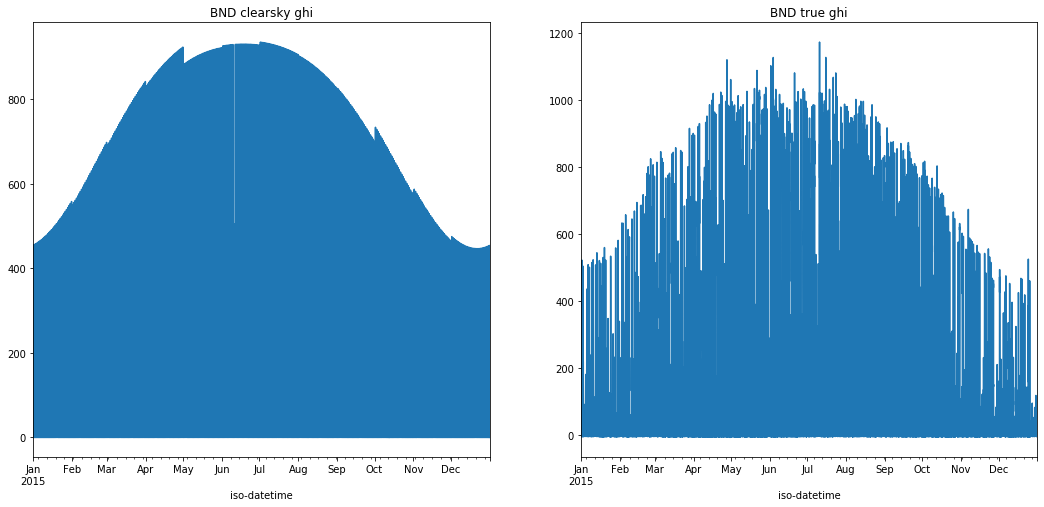

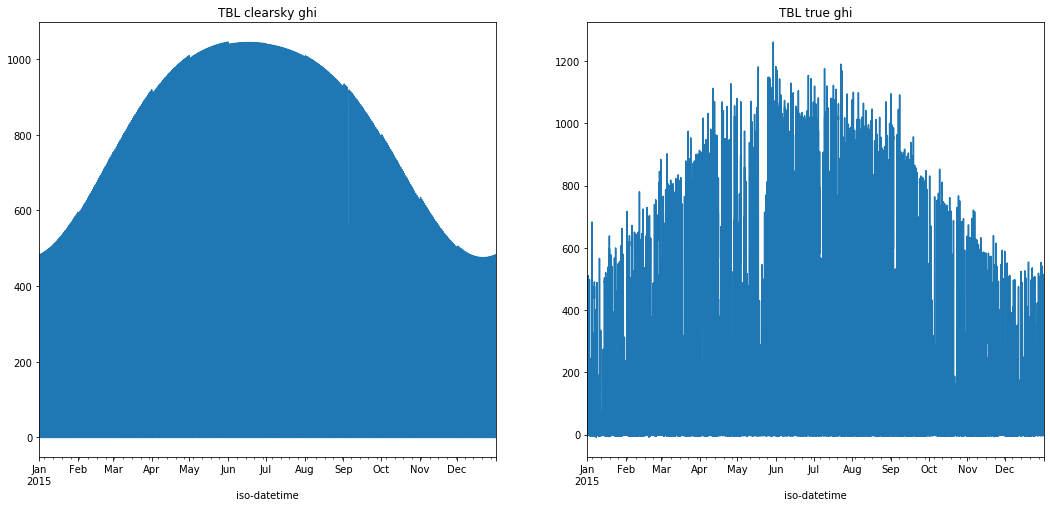

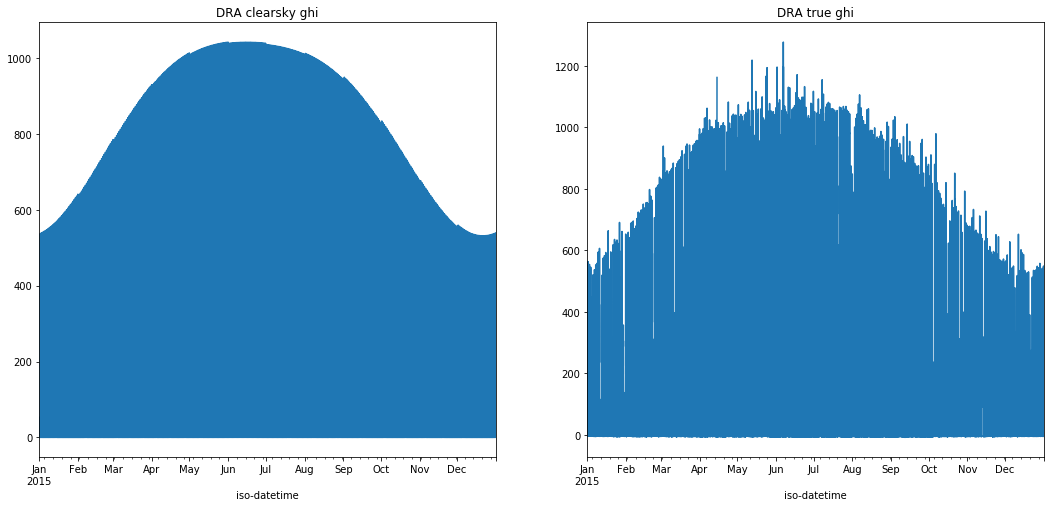

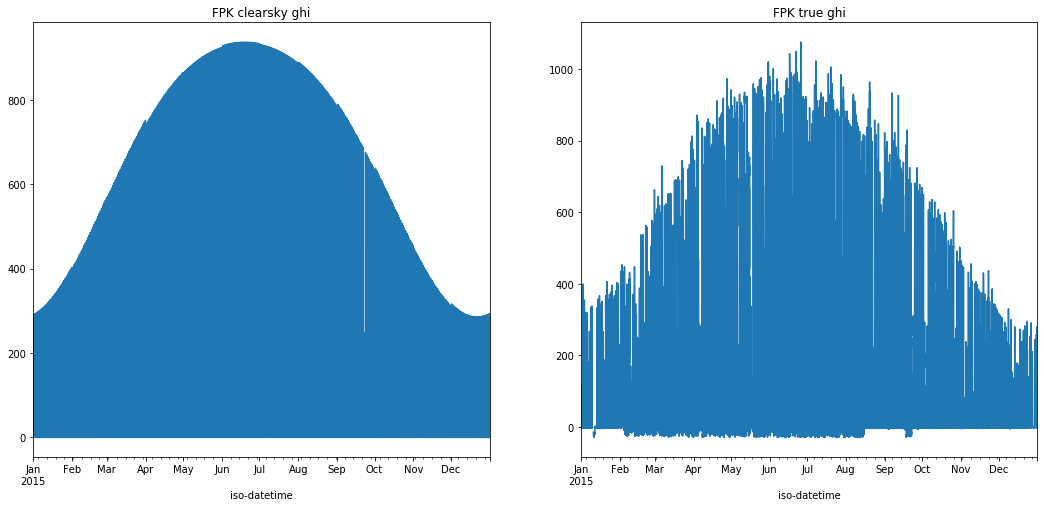

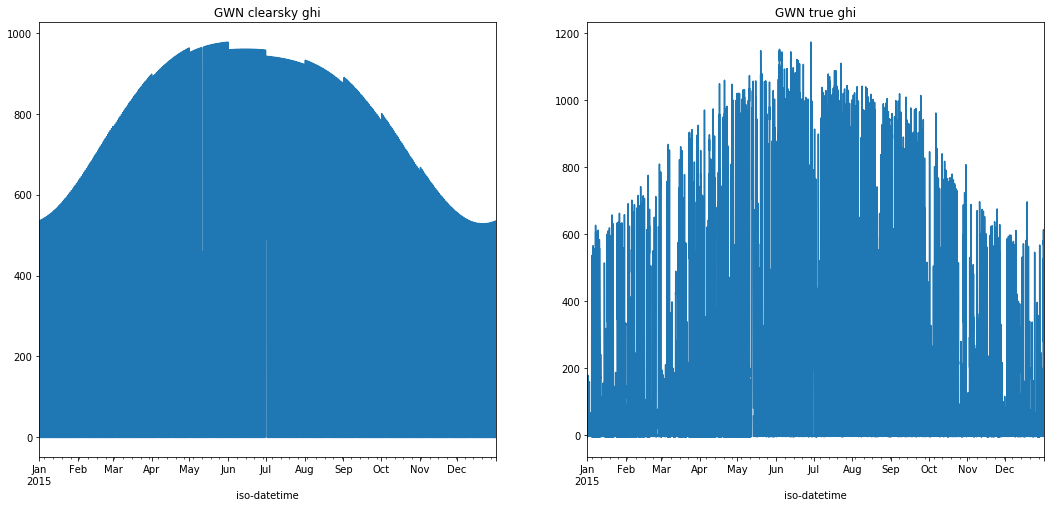

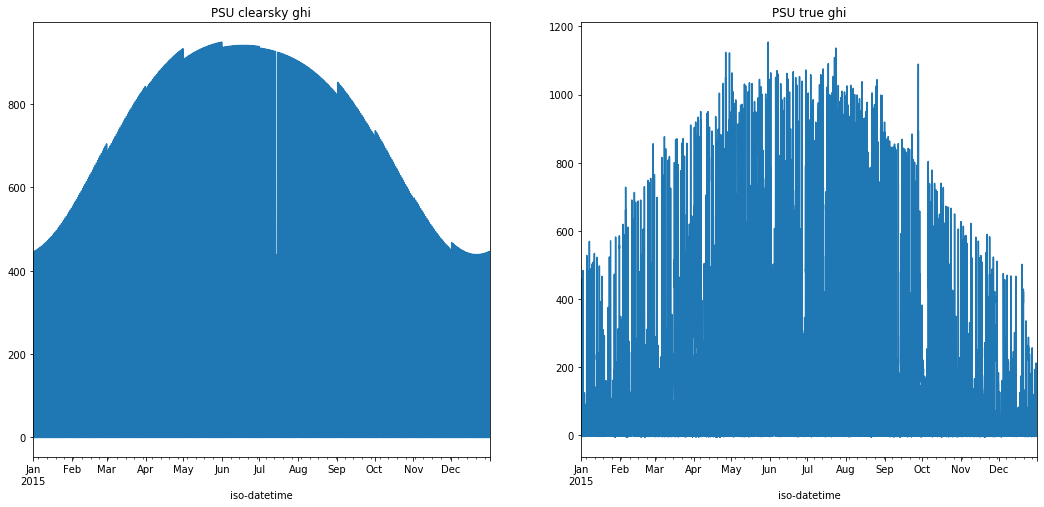

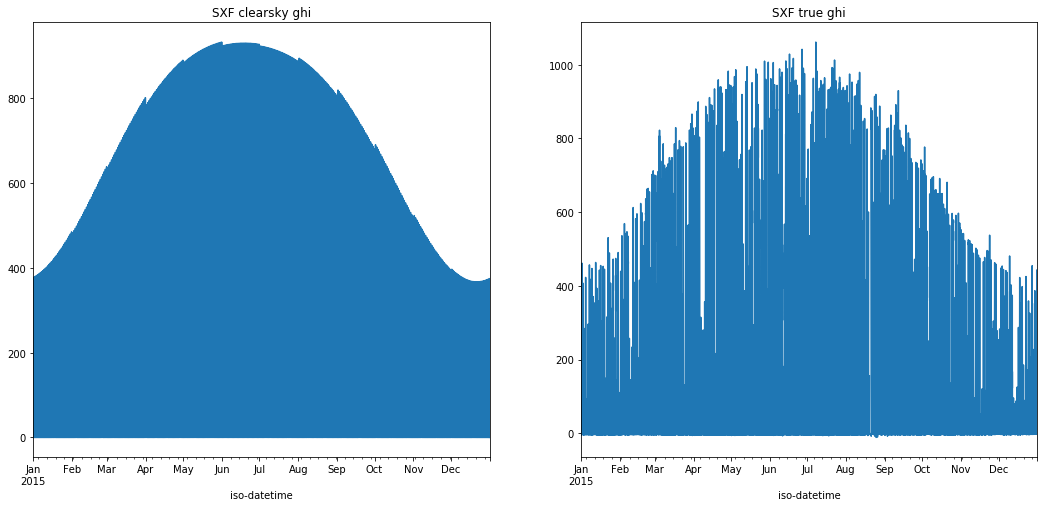

In [115]:
for station in Stations:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))  # 1 row, 2 columns
    clearsky_ghi_2015[station].plot(title=f'{station} clearsky ghi', ax=ax1)
    true_ghi_2015[station].plot(title=f'{station} true ghi', ax=ax2)

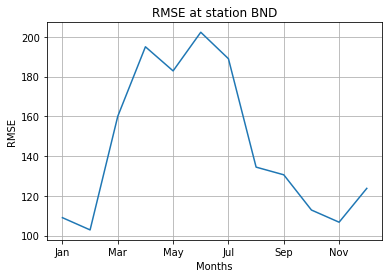

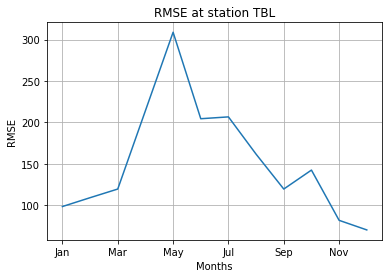

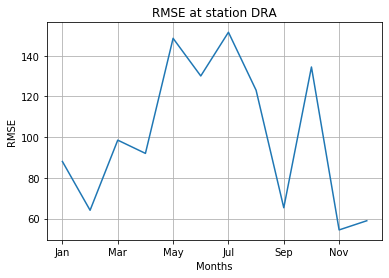

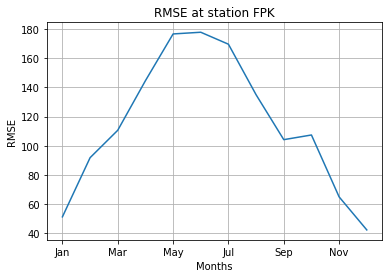

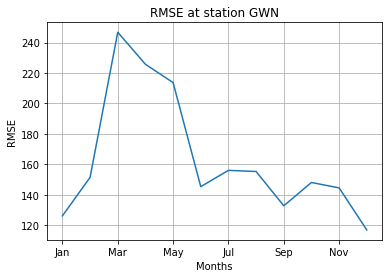

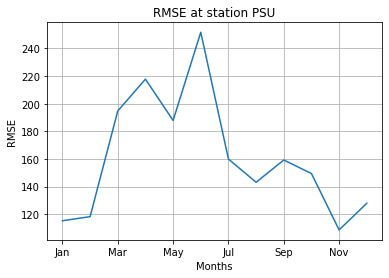

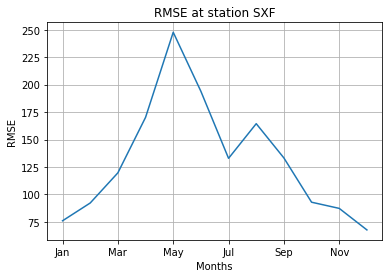

In [104]:
Months = ['', 'Jan', 'Mar',  'May', 'Jul', 'Sep',  'Nov', 'Dec']
for i, station in enumerate(Stations):
    plt.figure(i)
    plt.title(f"RMSE at station {station}")
    plt.xlabel('Months')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.gca().set_xticklabels(Months)
    plt.plot(rmse_2015_months[station])

In [113]:
for station in Stations:
    print(station, ":", np.mean(rmse_2015_months[station]))

BND : 145.78744830099436
TBL : 153.16522998925922
DRA : 100.77749170809045
FPK : 114.67532762932036
GWN : 163.61671501202602
PSU : 161.19727337003178
SXF : 131.47996922662102


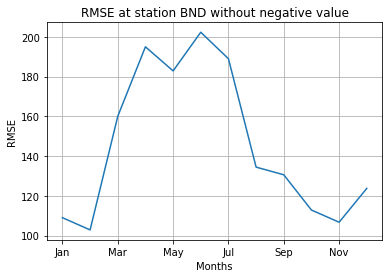

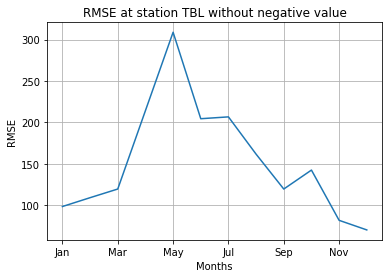

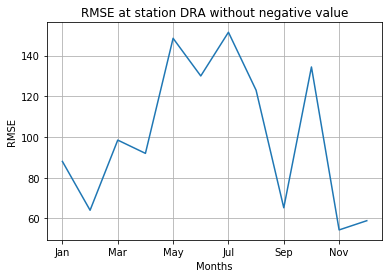

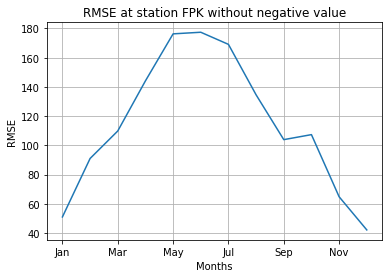

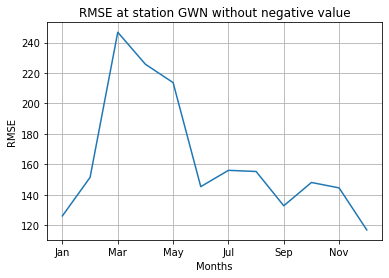

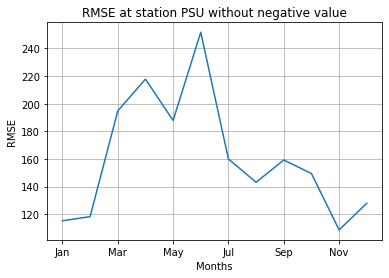

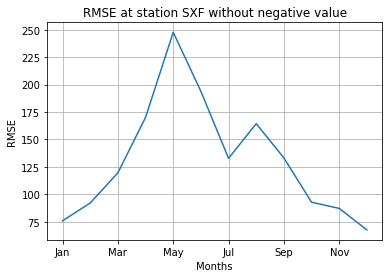

In [109]:
Months = ['', 'Jan', 'Mar',  'May', 'Jul', 'Sep',  'Nov', 'Dec']
for i, station in enumerate(Stations):
    plt.figure(i)
    plt.title(f"RMSE at station {station} without negative value")
    plt.xlabel('Months')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.gca().set_xticklabels(Months)
    plt.plot(rmse_2015_months_noNeg[station])

In [114]:
for station in Stations:
    print(station, ":", np.mean(rmse_2015_months_noNeg[station]))

BND : 145.76314901919227
TBL : 153.1485072912346
DRA : 100.7148798567167
FPK : 114.29278756730427
GWN : 163.59818189624406
PSU : 161.19103079542697
SXF : 131.45411078204634
